In [251]:
import json
import pandas as pd
import numpy as np

import sys
sys.path.append("../")
import importlib
import mqe
importlib.reload(mqe)
importlib.reload(mqe.plot)
importlib.reload(mqe.forecast)

<module 'mqe.forecast' from '../mqe/forecast.py'>

In [252]:
trial_path = '../result/gefcom2014-wind/'
trial_name = 'trial_final_test'
params_path = trial_path+trial_name+'/params_'+trial_name+'.json'
model_name = 'lightgbm'

In [253]:
with open(params_path, 'r', encoding='utf-8') as file:
    params_json = json.loads(file.read())

In [254]:
path = '../result/gefcom2014-wind/'+trial_name+'/dfs_X_valid/*.csv'
dfs_X_valid = mqe.forecast.load_dfs_trial(path)

In [255]:
trial = mqe.forecast.Trial(params_json)

In [206]:
model_split_site = trial.load_models( '../result/gefcom2014-wind/'+trial_name+'/models/')

100%|██████████| 150/150 [02:01<00:00,  1.23it/s]


In [195]:
import re
def natural_sort(l):
    # https://stackoverflow.com/questions/4836710/is-there-a-built-in-function-for-string-natural-sort 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)] 
    l_sorted = sorted(l, key=alphanum_key)

    return l_sorted

In [256]:
dfs_X_valid = [[df_X_valid[column] for column in natural_sort(df_X_valid.columns.levels[0])] for df_X_valid in dfs_X_valid]

In [257]:
dfs_y_pred = trial.predict_split_site([dfs_X_valid[0]], model_split_site)

  0%|          | 0/10 [00:00<?, ?it/s]

Predicting...


100%|██████████| 10/10 [00:03<00:00,  2.54it/s]


<AxesSubplot:xlabel='ref_datetime,valid_datetime'>

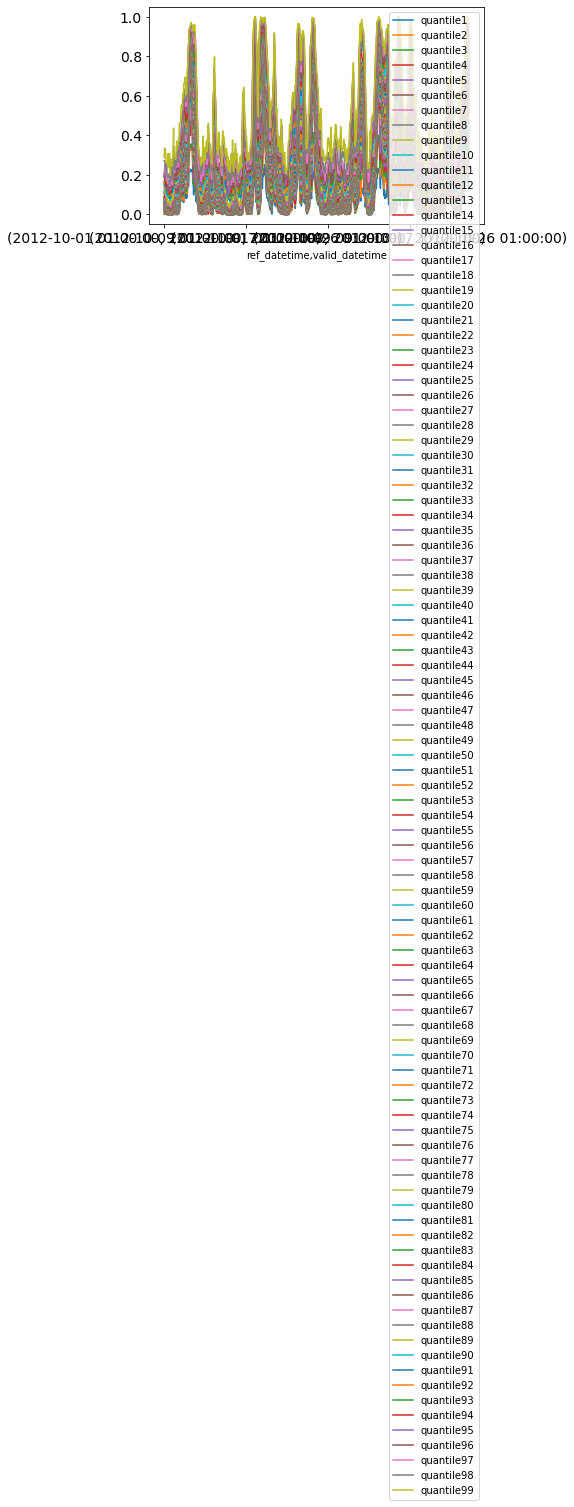

In [263]:
dfs_y_pred[0][0]['lightgbm'].plot()